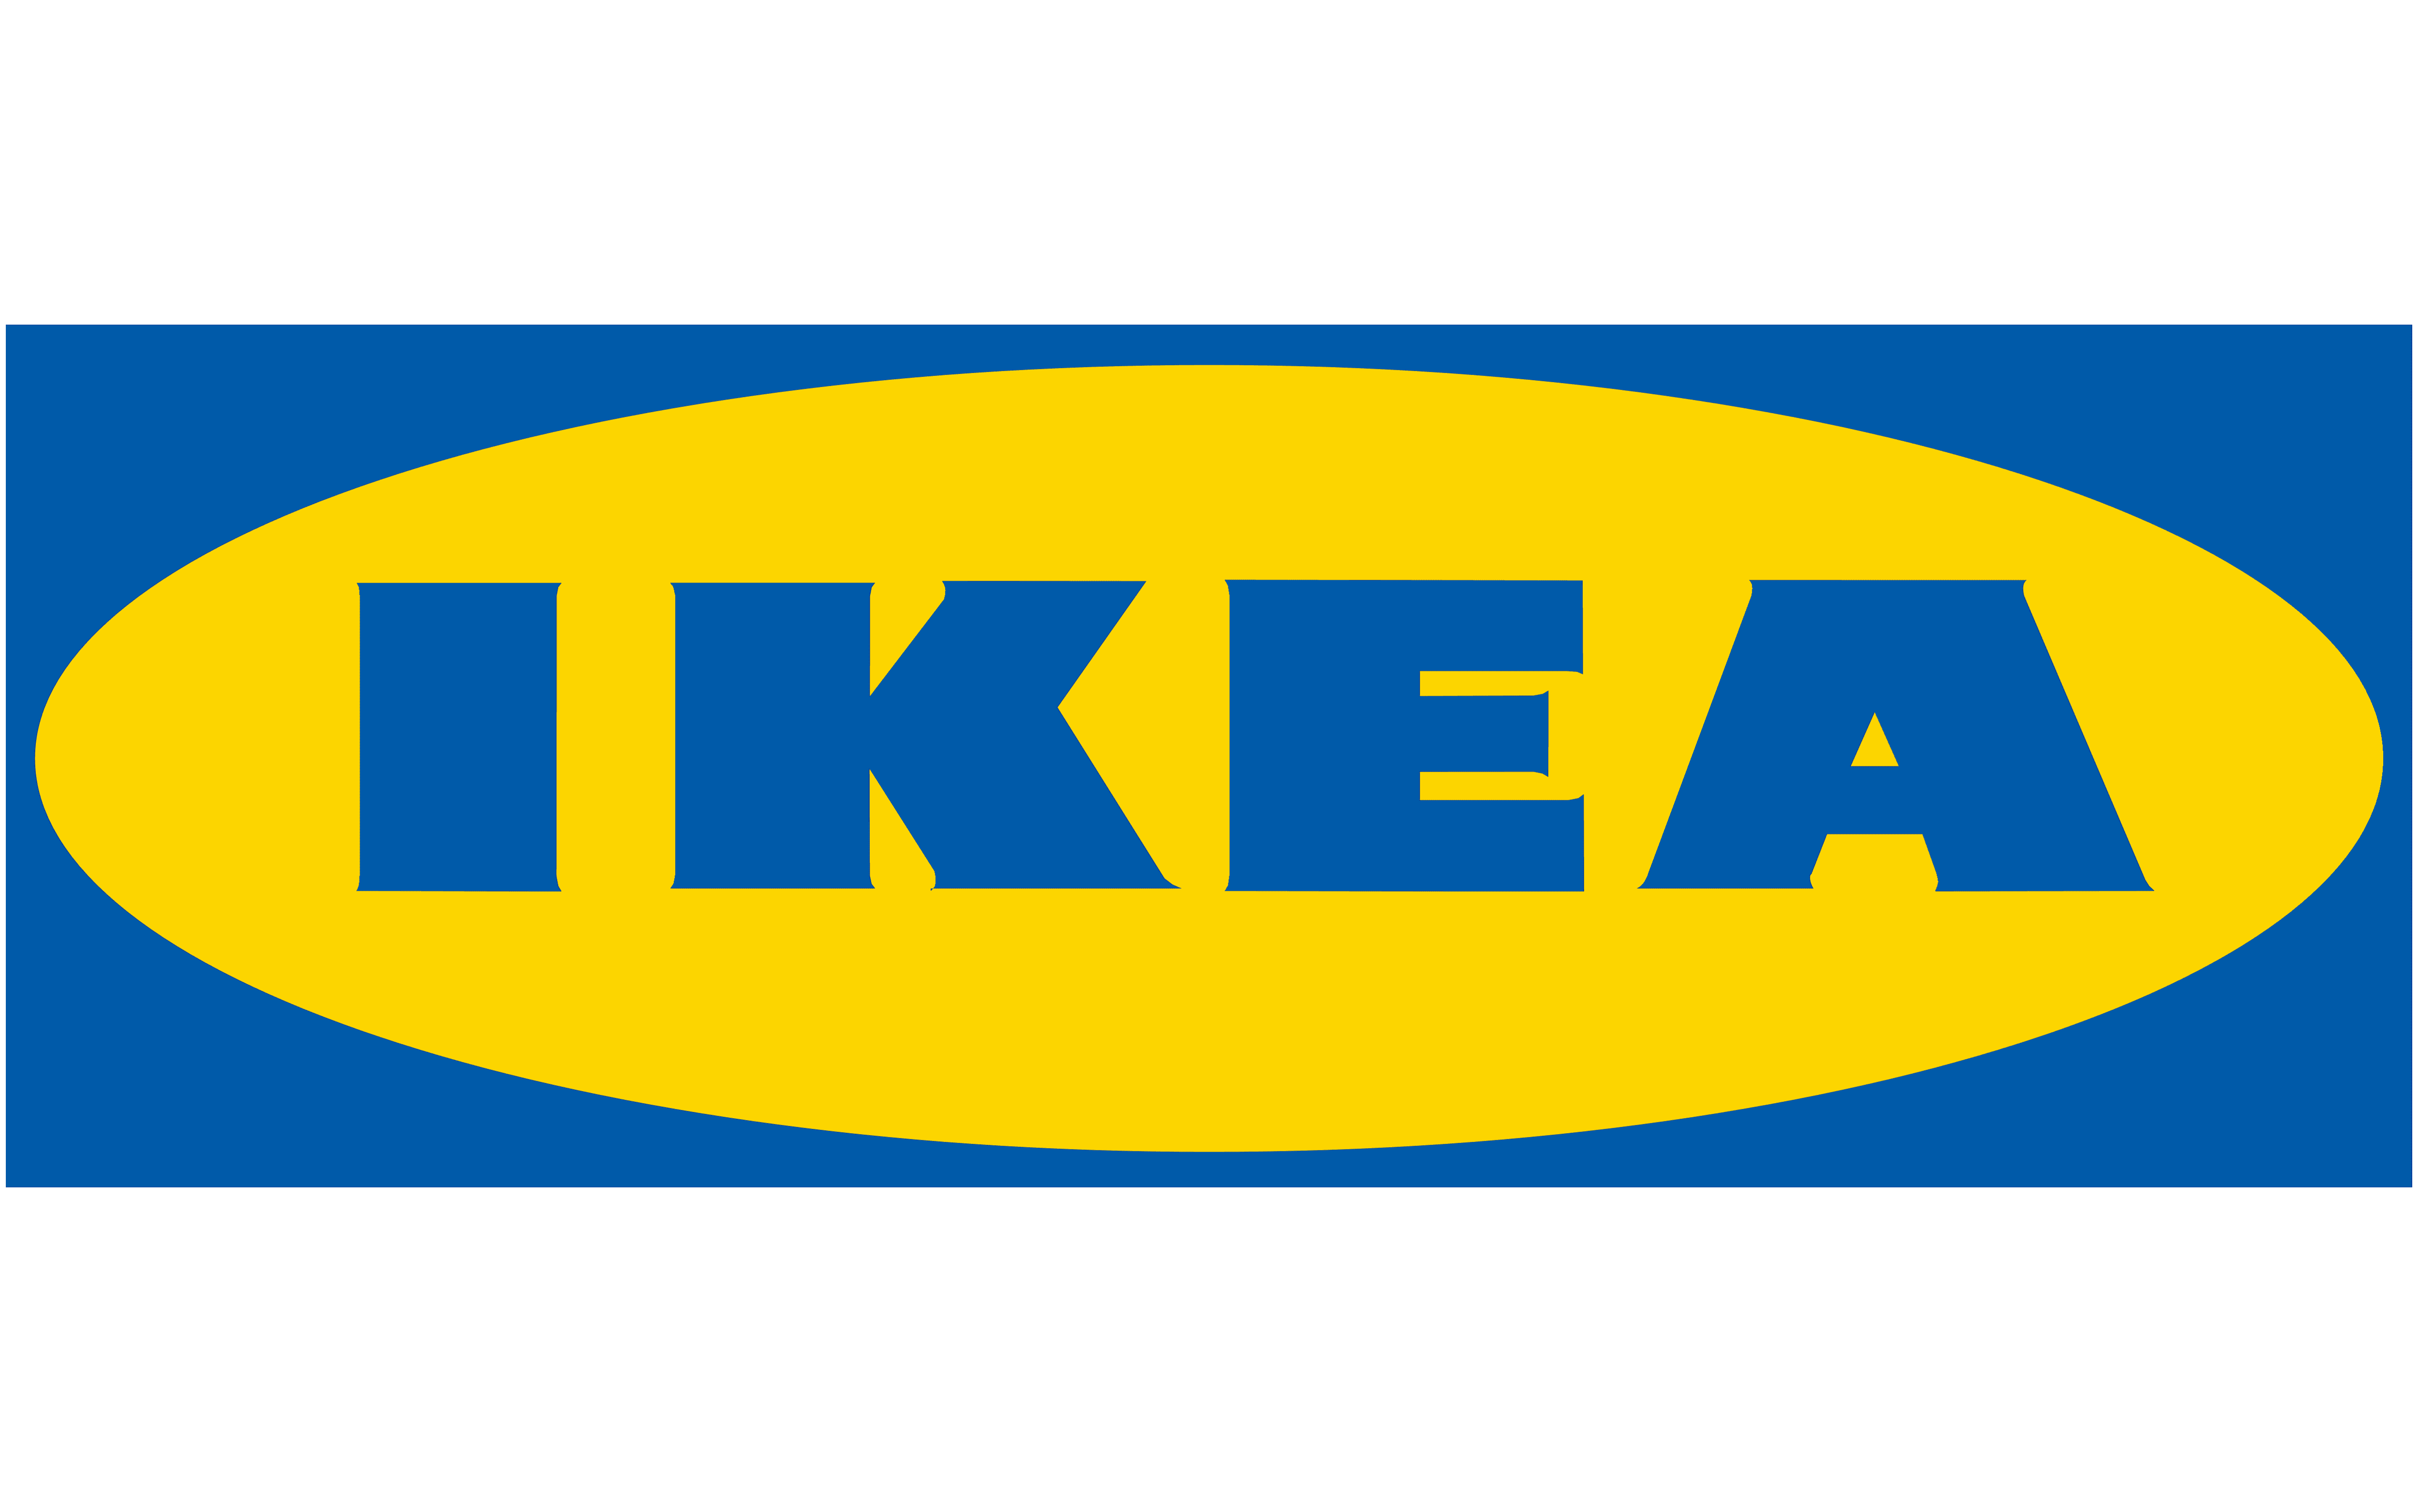

<br>

# IKEA 
## Sofas Data Vitualization<br>

<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib:
Matplotlib is a comprehensive plotting library for Python that provides a flexible and customizable interface for creating a wide range of static, interactive, and animated plots. With Matplotlib, users have fine-grained control over every aspect of their plots, allowing them to create publication-quality visualizations for scientific research, data analysis, and presentations. Its low-level API enables users to create complex plots from scratch, while its integration with other libraries, such as NumPy and Pandas, makes it suitable for various data analysis tasks. Whether you need to create simple line plots or intricate multi-panel figures, Matplotlib offers the tools and flexibility to meet your visualization needs.

# Seaborn:
Seaborn is a powerful Python visualization library built on top of Matplotlib that specializes in creating informative and visually appealing statistical graphics. With Seaborn, users can quickly explore relationships in their data, visualize distributions, and uncover patterns with minimal code. It provides a high-level interface for creating complex plots with simple functions and sensible defaults, making it accessible to users of all experience levels. Seaborn's integration with Pandas DataFrames and its built-in themes and color palettes simplify the process of creating publication-quality visualizations for data analysis, research, and presentations. Whether you're a beginner or an experienced data scientist, Seaborn offers the tools and capabilities to effectively communicate insights from your data.

<br>

## Fabric Sofa
<br>

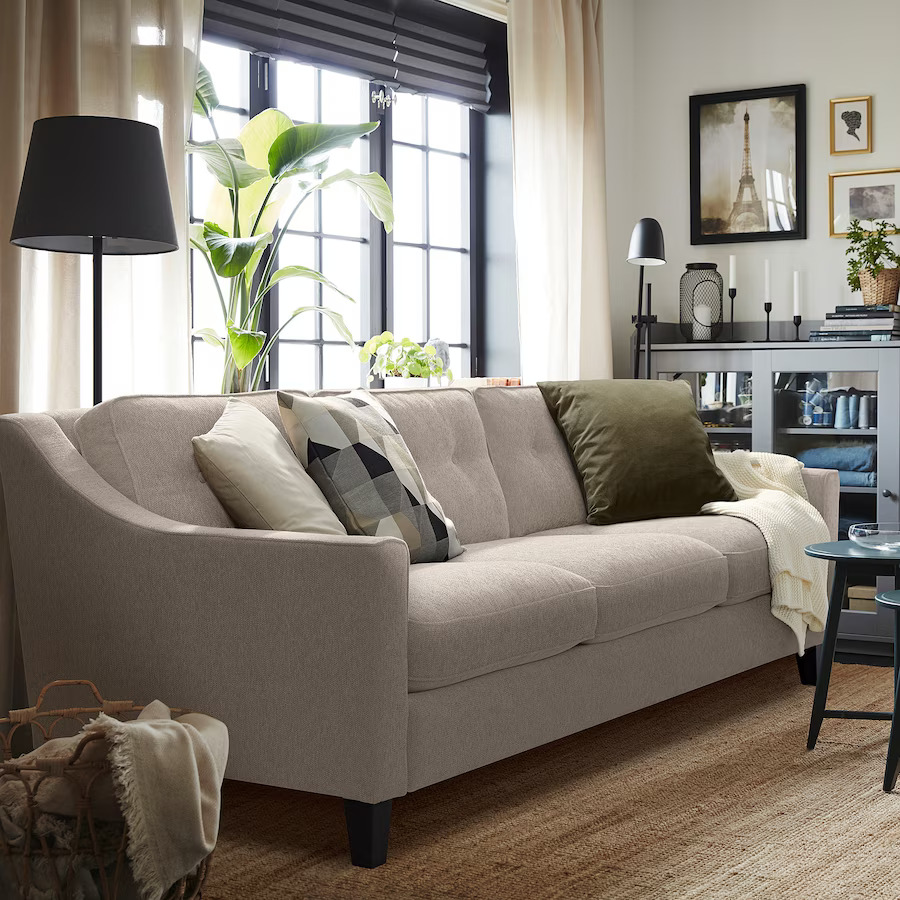

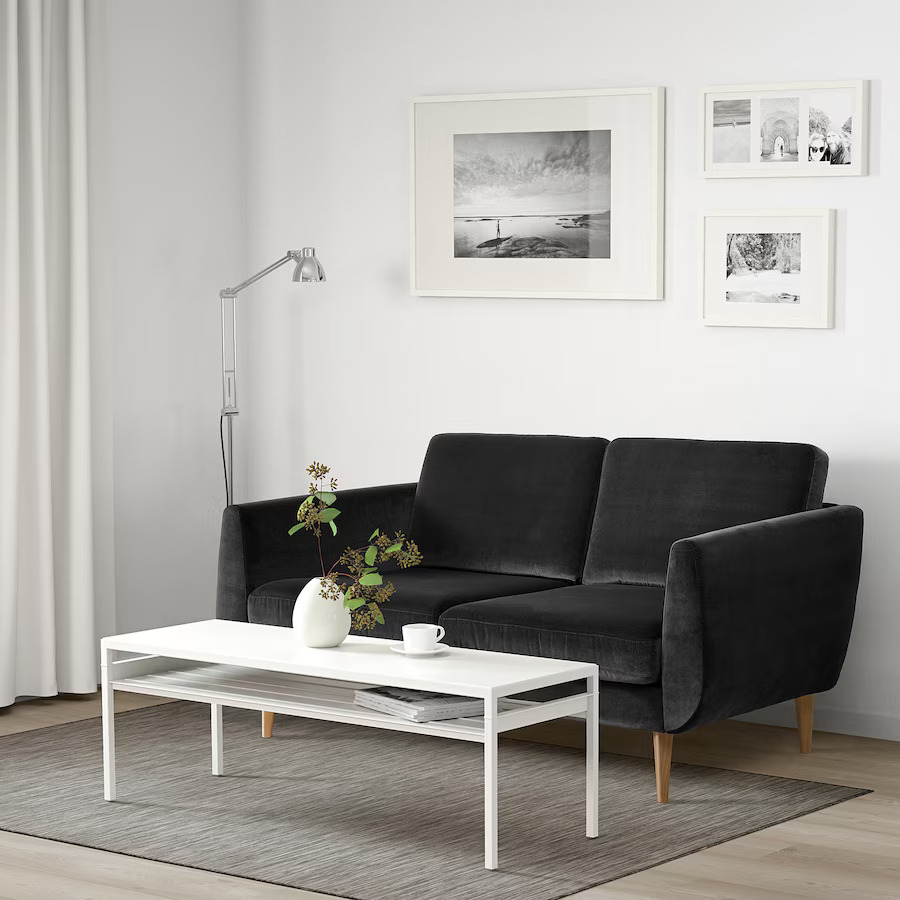

<br>

## Modular Sofa
<br>

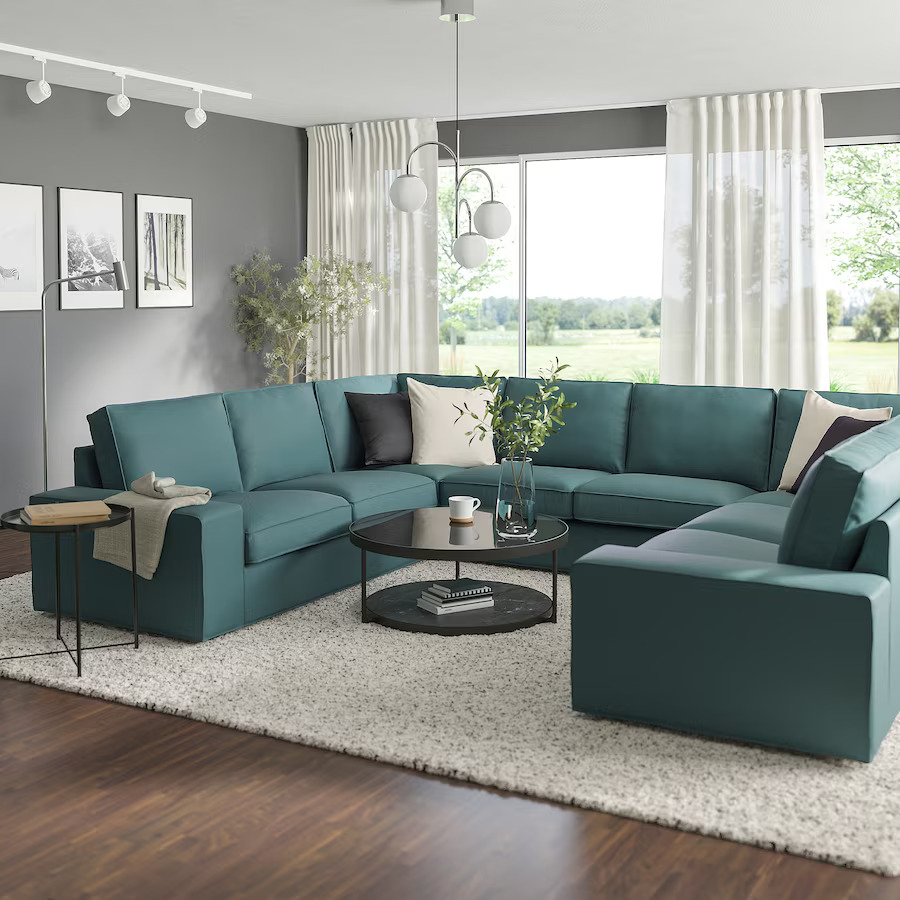

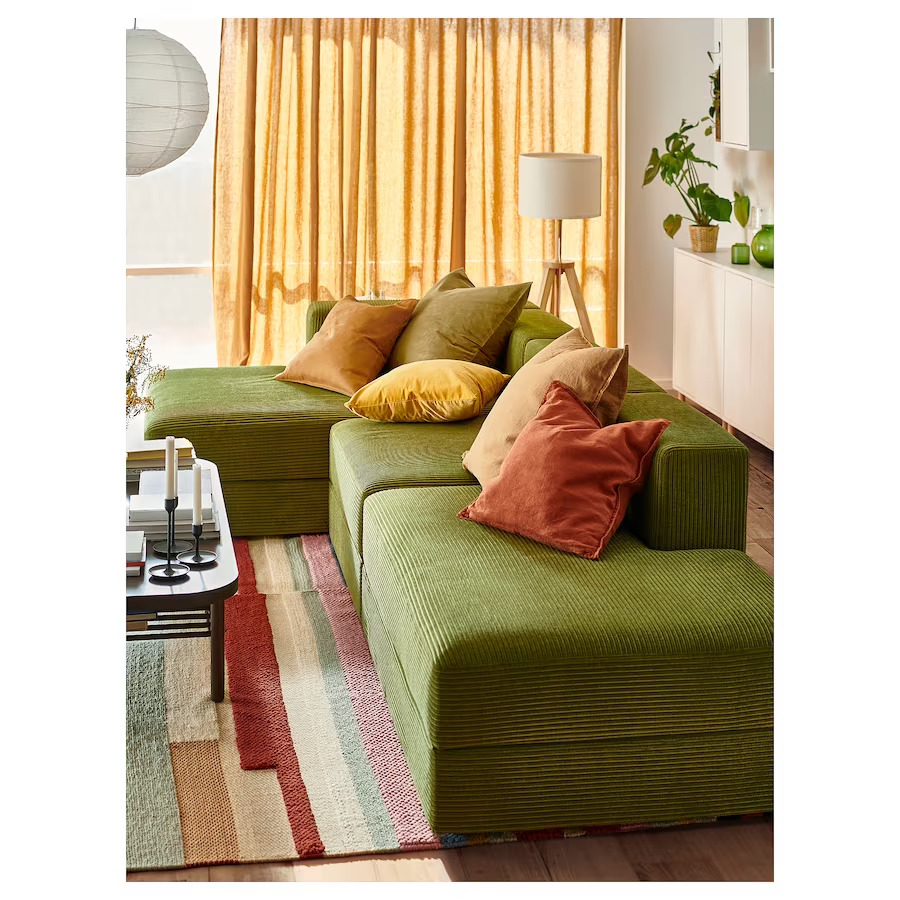

<br>

## Sofa Bed
<br>

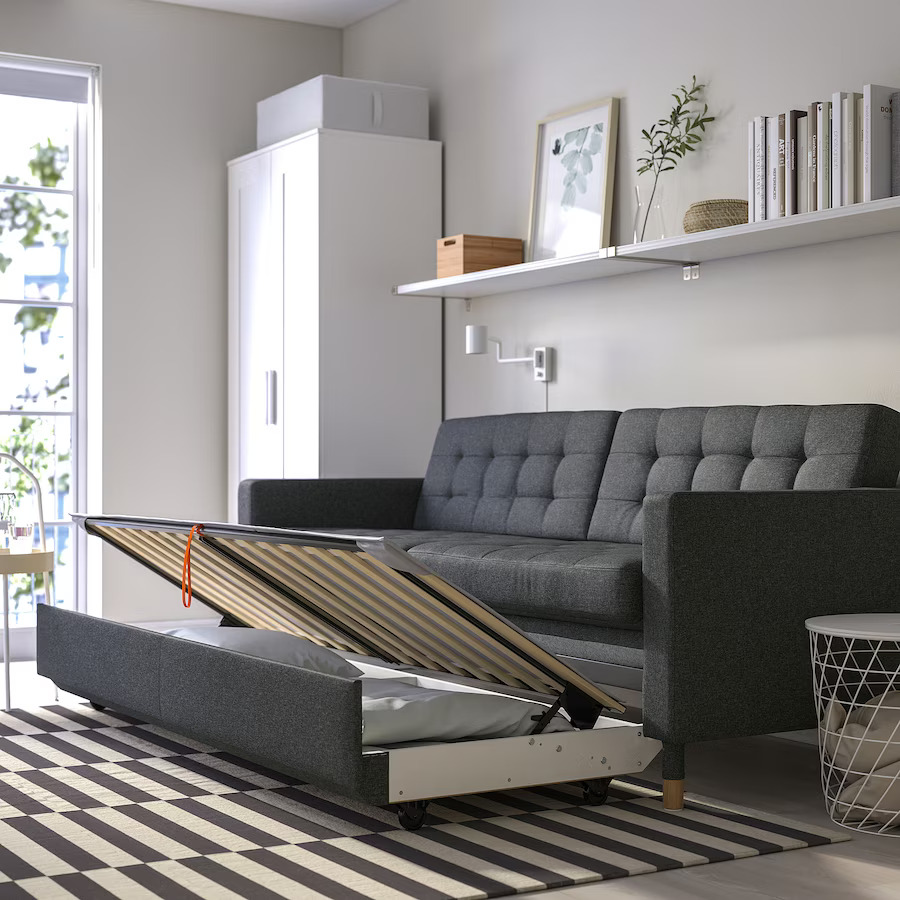

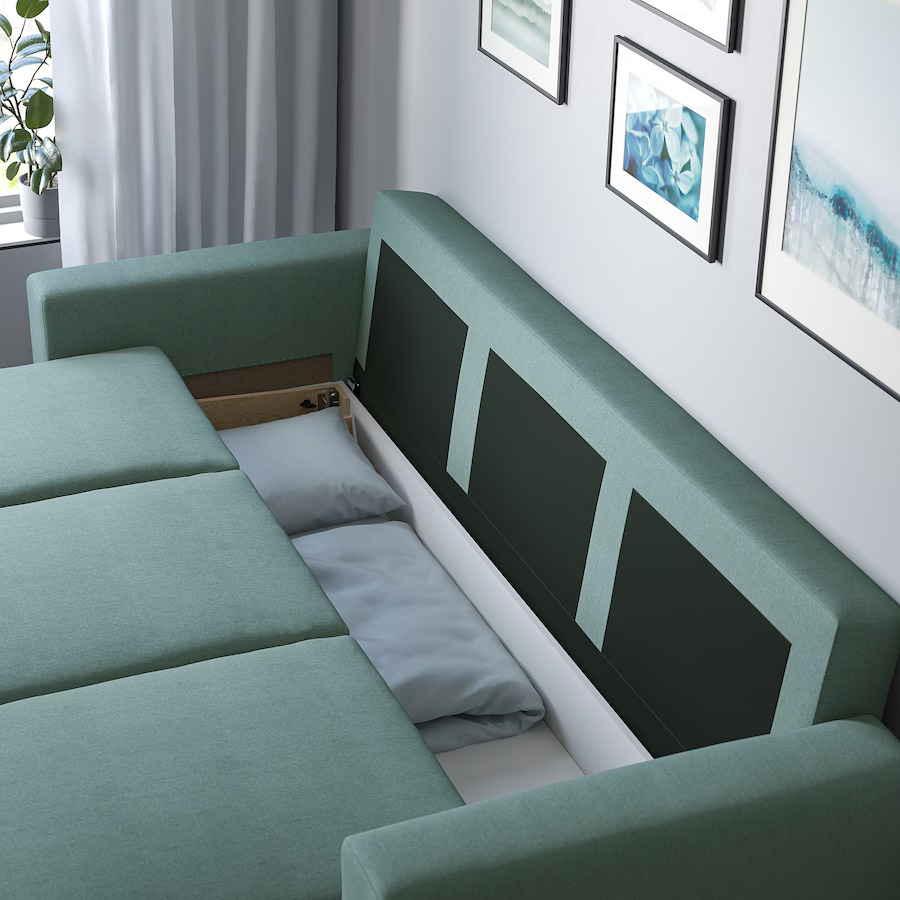

<br>

## Chaise Longue
<br>

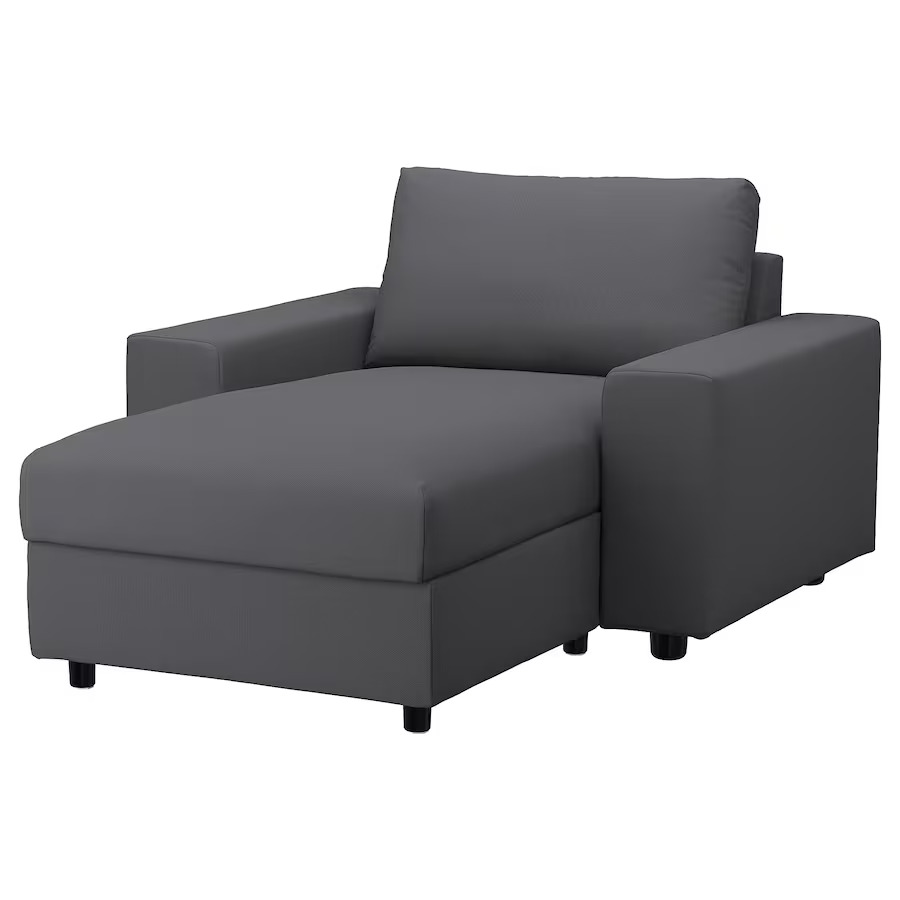

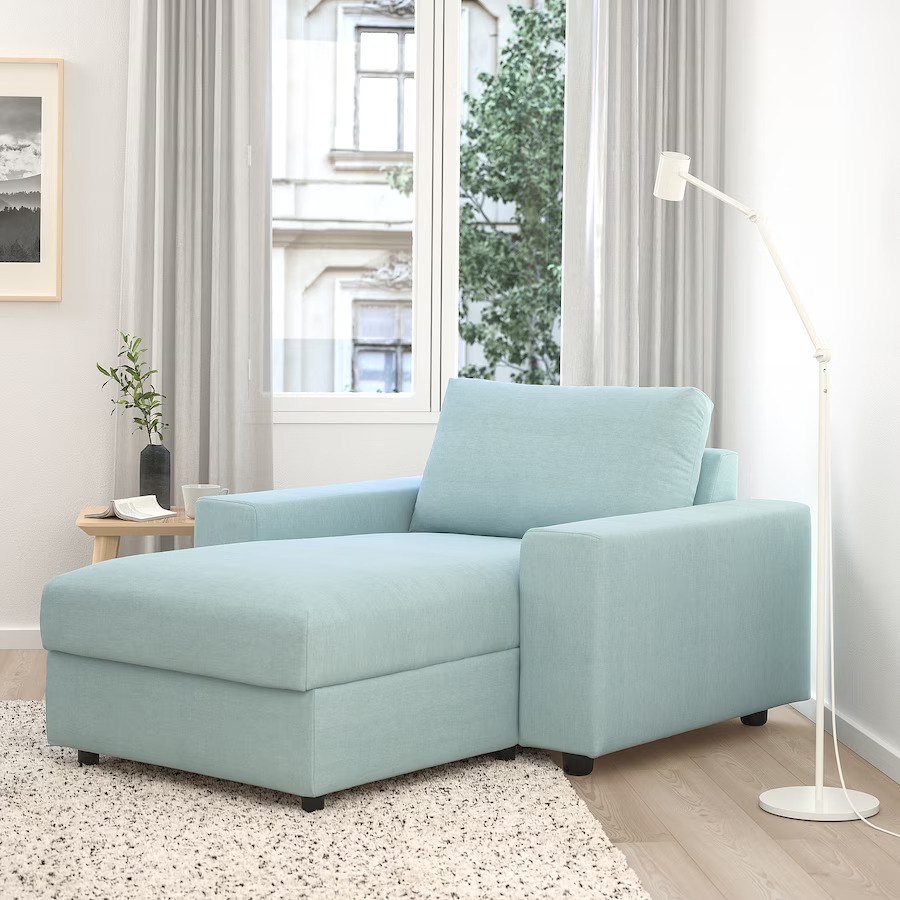

In [5]:
data = pd.read_csv('final_cleaned.csv')

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

# Price Analysis

1. What is the range of prices for all furniture items?
2. What is the average price of all furniture items?
3. 
How does the price vary across different types of furniture
4. 
Is there a correlation between the price and the number of seats or t e materia
5. 
Are there any outliers in the price distribution?

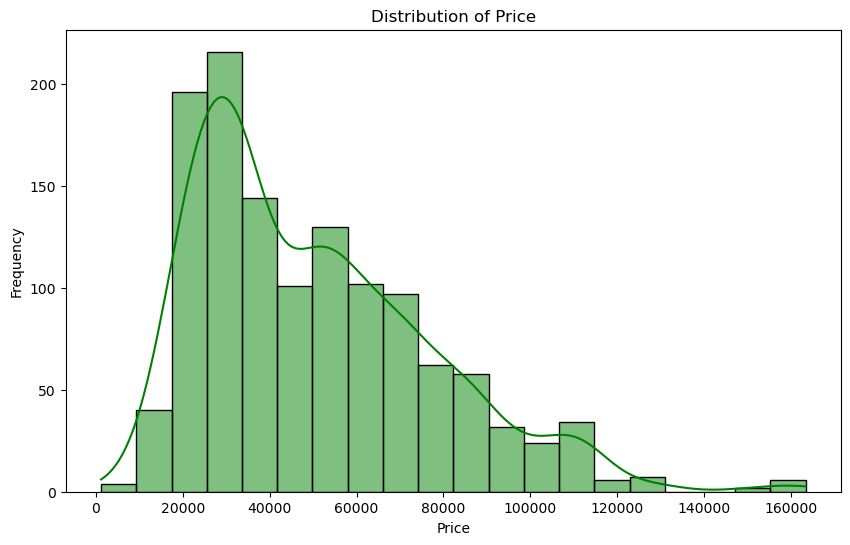

In [6]:
#Question 1:the prices of furnitute items are concentrated between (20k, 60k)

df=data
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True,color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

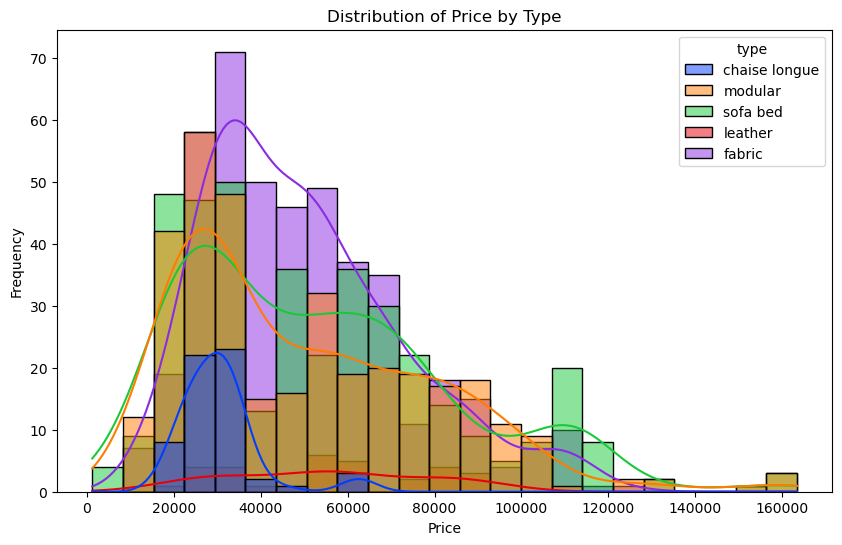

In [16]:
# the distribution with the type of the sofa

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True, hue='type', palette='bright', legend=True)
plt.title('Distribution of Price by Type')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


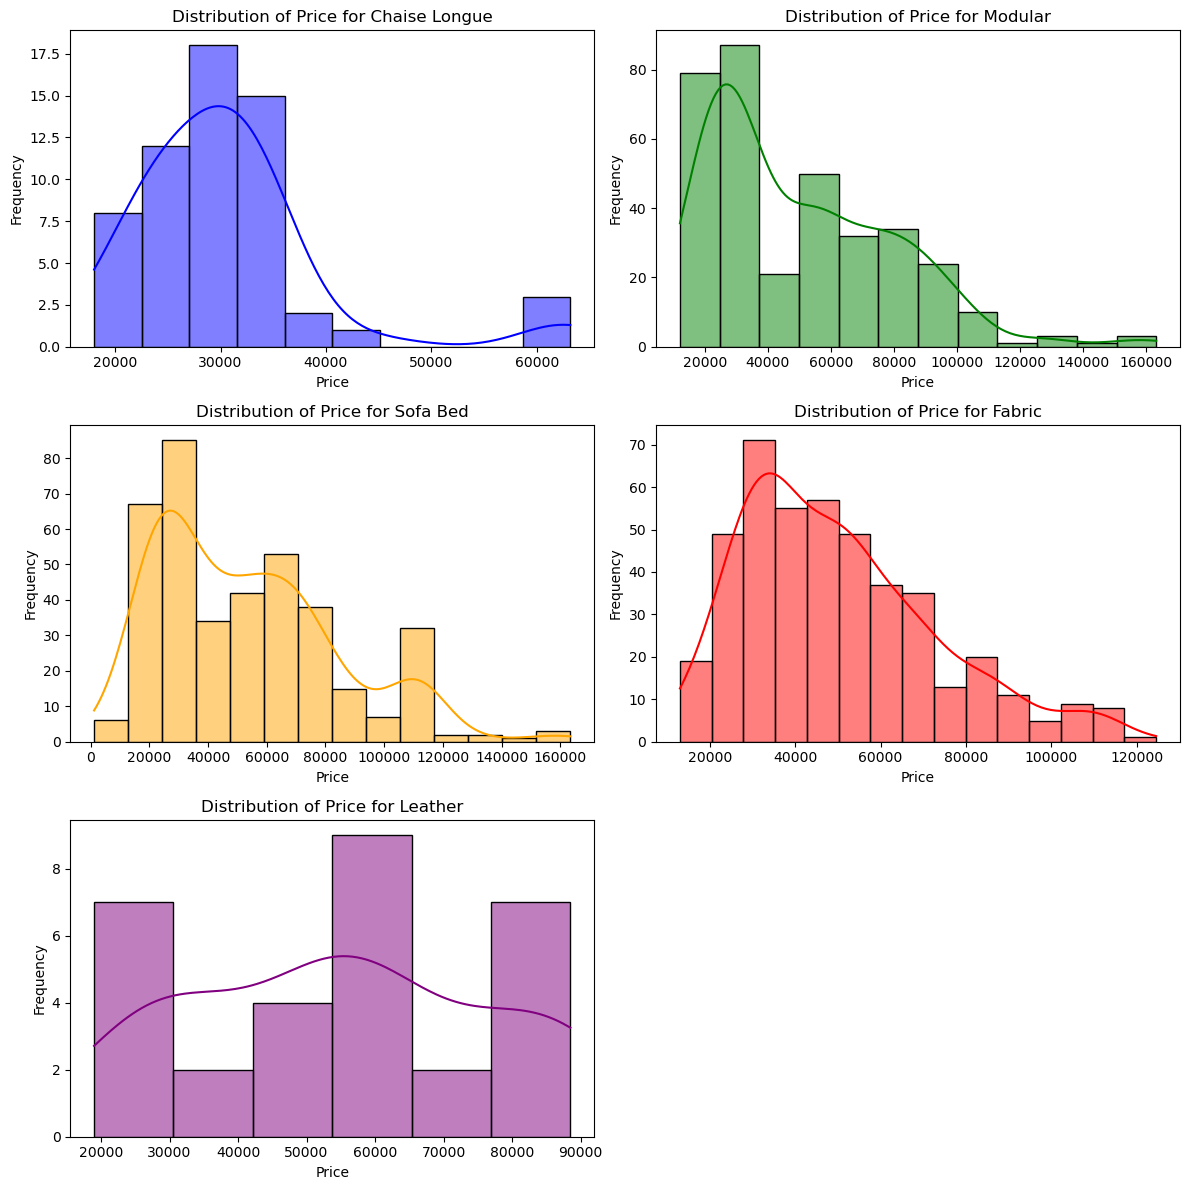

In [17]:
# the distribution for each type

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
sns.histplot(data=df[df["type"]=="chaise longue"], x='price', kde=True, color='blue')
plt.title('Distribution of Price for Chaise Longue')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.histplot(data=df[df["type"]=="modular"], x='price', kde=True, color='green')
plt.title('Distribution of Price for Modular')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.histplot(data=df[df["type"]=="sofa bed"], x='price', kde=True, color='orange')
plt.title('Distribution of Price for Sofa Bed')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
sns.histplot(data=df[df["type"]=="fabric"], x='price', kde=True, color='red')
plt.title('Distribution of Price for Fabric')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
sns.histplot(data=df[df["type"]=="leather"], x='price', kde=True, color='purple')
plt.title('Distribution of Price for Leather')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()


### The out comes:
The fabric and modular sofas are the most frequent products<br>
The most common price for all the sofas is between 30K L.E<br>
The most common price for the leather sofa type is 55k L.E<br>
The most common price for the rest of the types is 30k L.E<br>
<br>

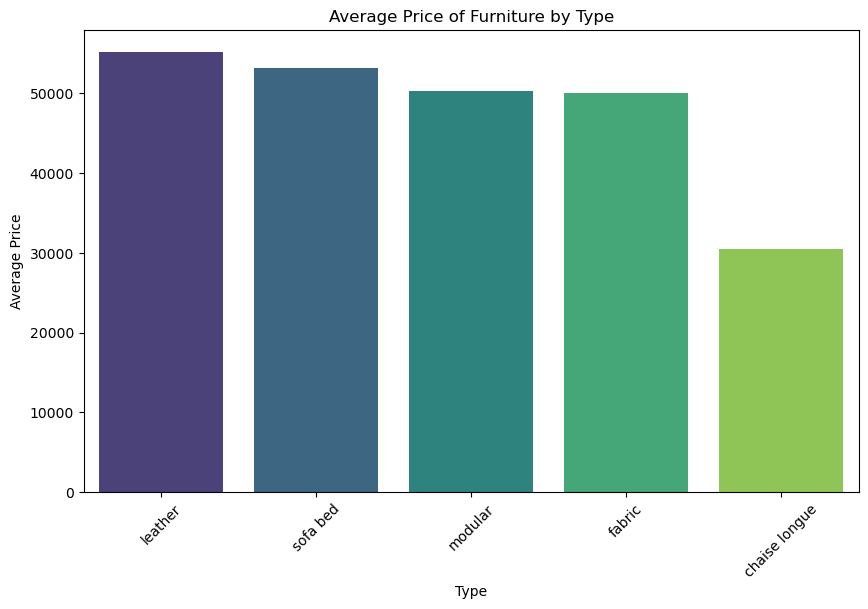

In [19]:
#Question 2: We can see that leather has the highest average meaning that it's the most expensive type of furniture
avg_price_type = df.groupby('type')['price'].mean().reset_index()

# Sort the materials based on their average price in descending order
avg_price_type_sorted = avg_price_type.sort_values(by='price', ascending=False)

# Set the color palette
palette = sns.color_palette("viridis", len(avg_price_type_sorted))

# Plot the average price of materials
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='price', data=avg_price_type_sorted, palette=palette)
plt.title('Average Price of Furniture by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

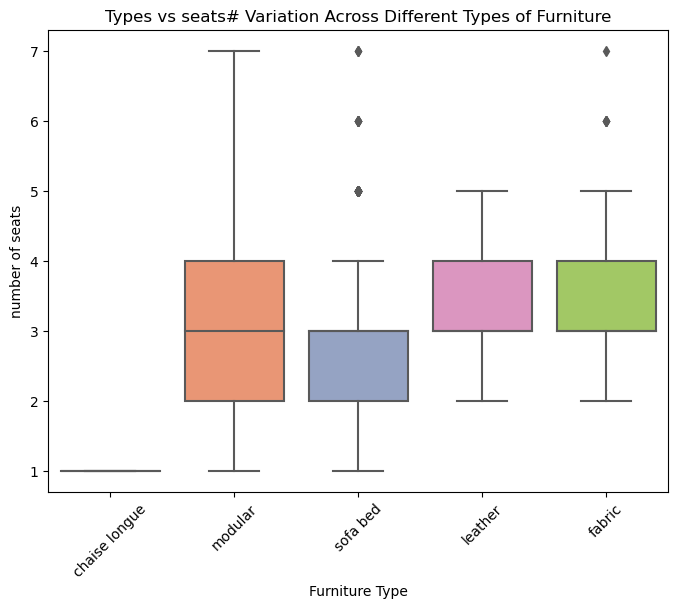

In [7]:
# the box plot for the sofas types VS seats available 

plt.figure(figsize=(8, 6))

#visualize the price distribution across different types of furniture
sns.boxplot(x='type', y='number_of_seats', data=df, palette='Set2')

# Add title and labels
plt.title('Types vs seats# Variation Across Different Types of Furniture')
plt.xlabel('Furniture Type')
plt.ylabel('number of seats')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()

### The out comes:
Most of the sofa beds are 2-3 seats<br>
Most of the modular sofas are 2-4 seats<br>
Most of the fabric and leater sofas are 3-4 seats<br>
<br>

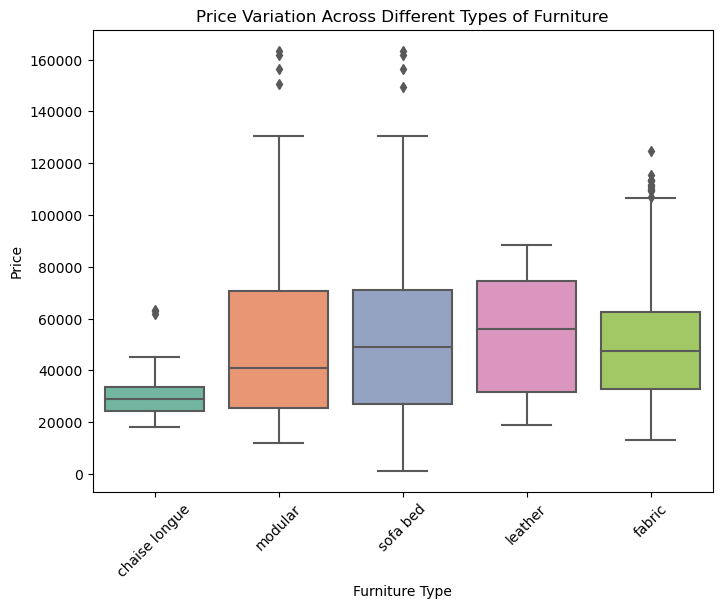

In [24]:
## the box plot for the sofas types VS price 

plt.figure(figsize=(8, 6))

#visualize the price distribution across different types of furniture
sns.boxplot(x='type', y='price', data=df, palette='Set2')

# Add title and labels
plt.title('Price Variation Across Different Types of Furniture')
plt.xlabel('Furniture Type')
plt.ylabel('Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()

## Plot Sofas types VS average price and the count for each type for the different colours 


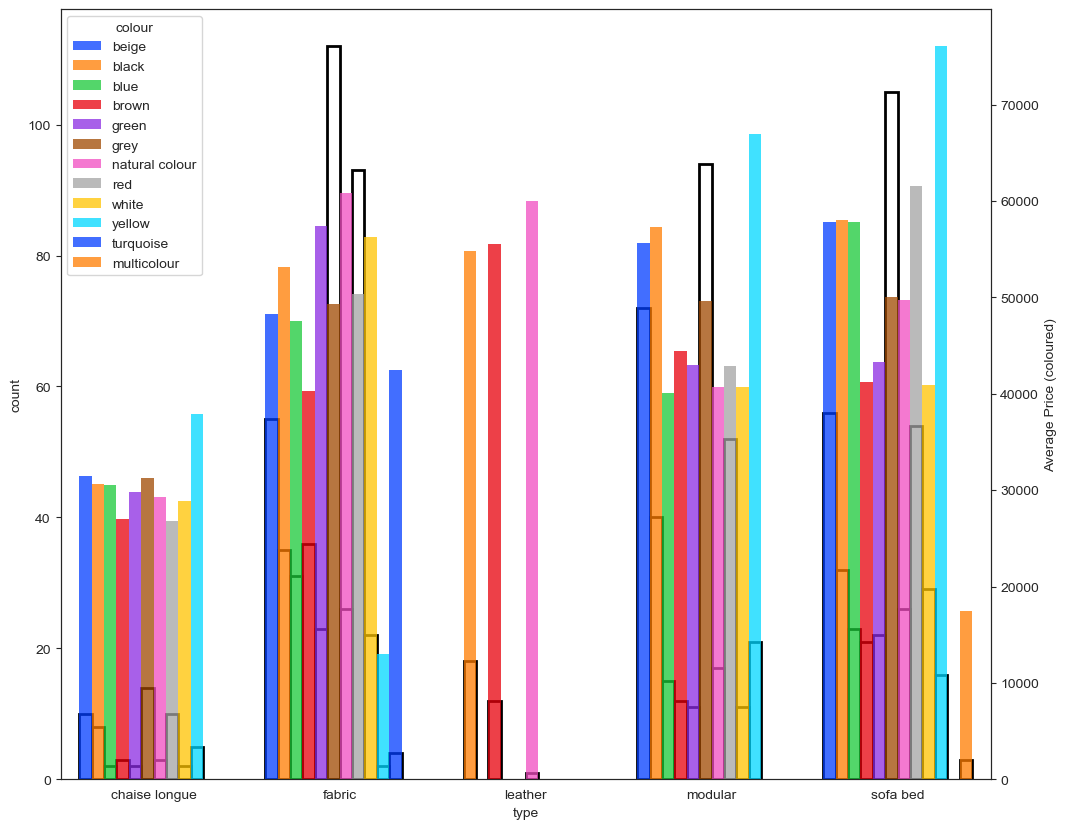

In [29]:
# the Sofa type VS average price and the count for each type for the different colours 

type_color_counts = df.groupby(['type', 'colour']).size().reset_index(name='count')
avg_prices = df.groupby(['type','colour'])['price'].mean().reset_index()
merged_df = pd.merge(type_color_counts, avg_prices, on=['type', 'colour'])

palette = sns.color_palette("bright")
sns.set_style("white")
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='type', y='count', hue='colour', data=merged_df, palette=palette,edgecolor='black',linewidth=2,fill=False)
ax.legend_.remove()
sns.barplot(x='type', y='price', hue='colour', data=merged_df,ax=plt.twinx(), palette=palette,linewidth=0,saturation=15,alpha=.75)
plt.ylabel("Average Price (coloured)")

plt.show()


### The out comes :
The most common color is the grey, the least common one is the yellow color for all sofas<br>
The highest average price is the yellow color in the sofa bed, modular,chaise longue<br>
The grey color is always in the middle way price<br>
The cheapest price is the brown color<br>
<br>

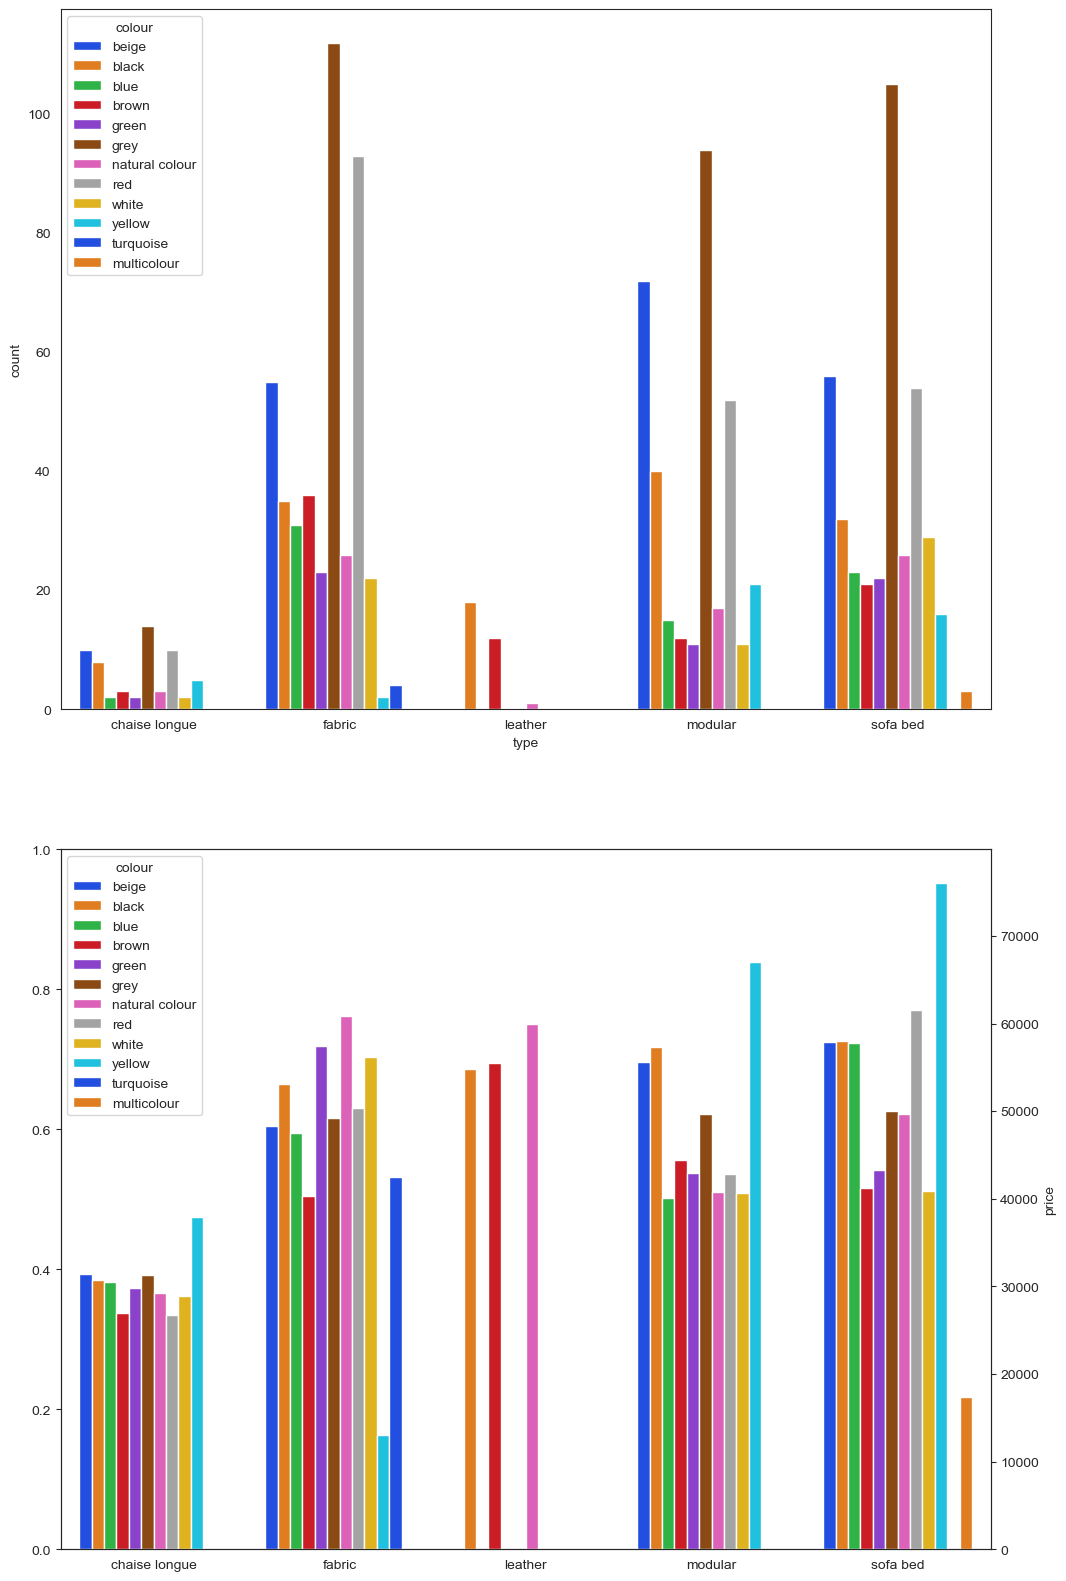

In [31]:
# plot Sofa type VS average price and the count for each type for the different colours 

plt.figure(figsize=(12, 20))
plt.subplot(2,1,1)
ax = sns.barplot(x='type', y='count', hue='colour', data=merged_df, palette=palette)

plt.subplot(2,1,2)
sns.barplot(x='type', y='price', hue='colour', data=merged_df,ax=plt.twinx(), palette='bright', )
plt.show()

## Plot Sofas types VS average price and the count for each type for the different seats numbers 


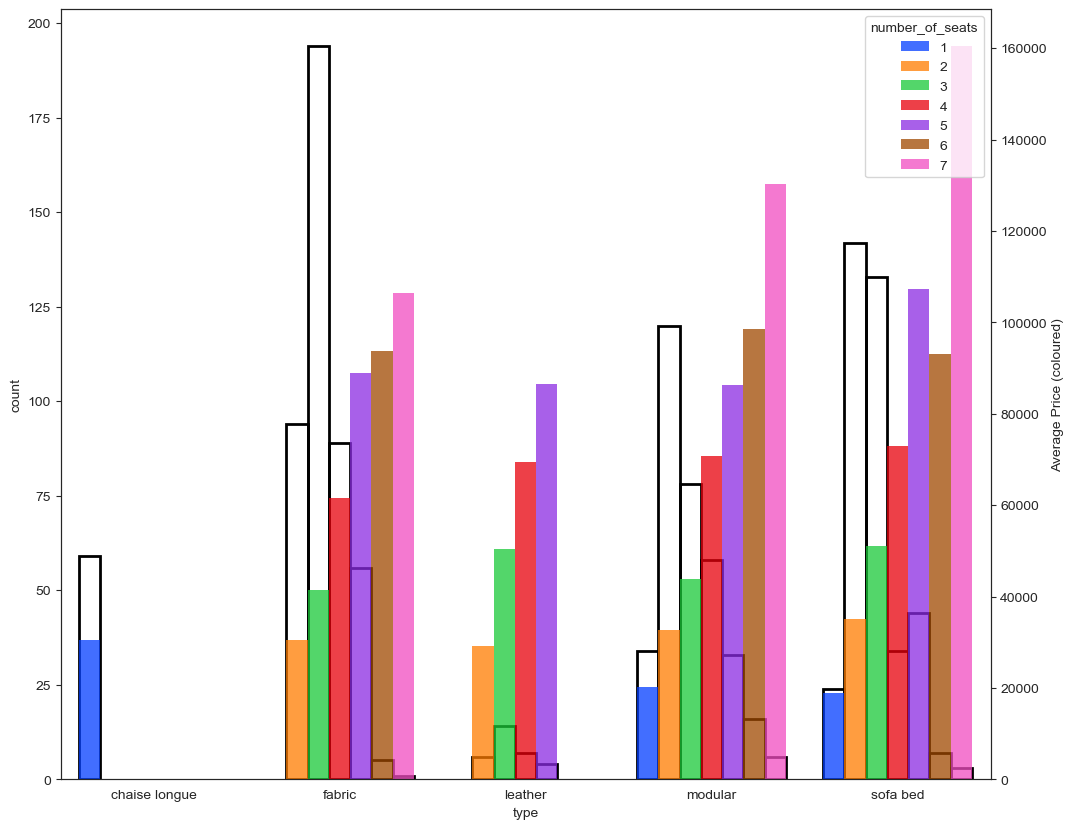

In [32]:
# the Sofa type VS average price and the count for each type for the different colours 

type_color_counts = df.groupby(['type', 'number_of_seats']).size().reset_index(name='count')
avg_prices = df.groupby(['type','number_of_seats'])['price'].mean().reset_index()
merged_df = pd.merge(type_color_counts, avg_prices, on=['type', 'number_of_seats'])

palette = sns.color_palette("bright")
sns.set_style("white")
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='type', y='count', hue='number_of_seats', data=merged_df, palette=palette,edgecolor='black',linewidth=2,fill=False)
ax.legend_.remove()
sns.barplot(x='type', y='price', hue='number_of_seats', data=merged_df,ax=plt.twinx(), palette=palette,linewidth=0,saturation=15,alpha=.75)
plt.ylabel("Average Price (coloured)")

plt.show()


### The out comes:
The most expensive sofa with 7 seats, but with the least common availability <br>
The most common sofa is with 2-3 seats <br>
Despite having the least price for the chaise longue, but it still not the least in price <br>
The chaise longue is almost the same in price as a 2 seats sofa <br>
<br>

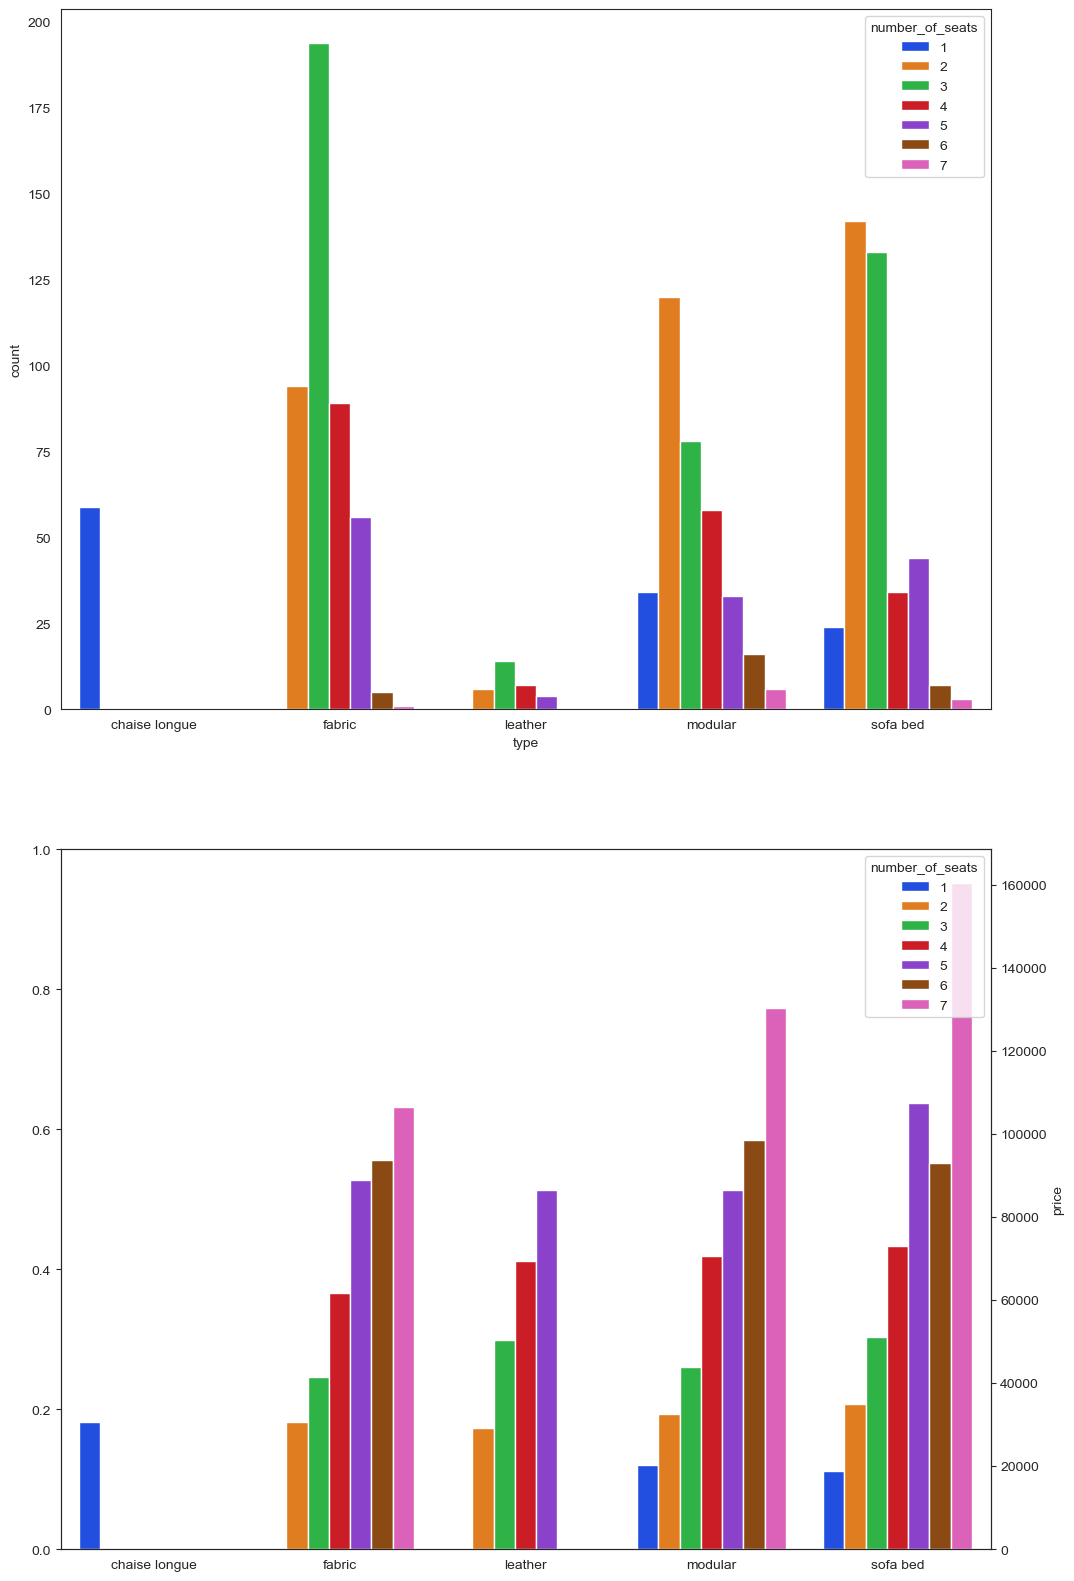

In [35]:
# plot Sofa type VS average price and the count for each type for the different seats number 

plt.figure(figsize=(12, 20))
plt.subplot(2,1,1)
ax = sns.barplot(x='type', y='count', hue='number_of_seats', data=merged_df, palette=palette)

plt.subplot(2,1,2)
sns.barplot(x='type', y='price', hue='number_of_seats', data=merged_df,ax=plt.twinx(), palette='bright', )
plt.show()

# the scatter plot visualizes the relationship between the price and the number of seats for different furniture types.


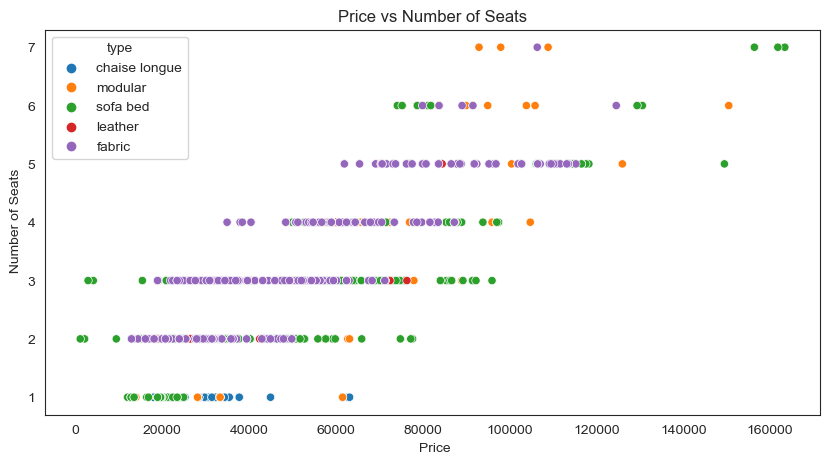

In [70]:
# Plot a scatter plot for 'price' vs 'number_of_seats' with  data
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price', y='number_of_seats',hue='type', data=df)
plt.title('Price vs Number of Seats')
plt.xlabel(' Price')
plt.ylabel(' Number of Seats')
plt.show()


In [71]:
leather_sofas = df.loc[df['type'] == 'leather']
correlation = leather_sofas["number_of_seats"].corr(leather_sofas["price"])
print(f"The correlation between the price and number of seats for the Leather sofas is: {correlation.round(4)}\n")

fabric_sofas = df.loc[df['type'] == 'fabric']
correlation = fabric_sofas["number_of_seats"].corr(fabric_sofas["price"])
print(f"The correlation between the price and number of seats for the Fabric sofas is: {correlation.round(4)}\n")

modular_sofas = df.loc[df['type'] == 'modular']
correlation = modular_sofas["number_of_seats"].corr(modular_sofas["price"])
print(f"The correlation between the price and number of seats for the Modular sofas is: {correlation.round(4)}\n")

sofa_bed_sofas = df.loc[df['type'] == 'sofa bed']
correlation = sofa_bed_sofas["number_of_seats"].corr(sofa_bed_sofas["price"])
print(f"The correlation between the price and number of seats for the Sofa Bed sofas is: {correlation.round(4)}\n")


The correlation between the price and number of seats for the Leather sofas is: 0.8171

The correlation between the price and number of seats for the Fabric sofas is: 0.8169

The correlation between the price and number of seats for the Modular sofas is: 0.8389

The correlation between the price and number of seats for the Sofa Bed sofas is: 0.822



## The out comes:
the correlation between the price and the number of seats for the different types of the sofas are strong, lineary propotional <br>
<br>

## Visualize the price distribution across different materials of furniture


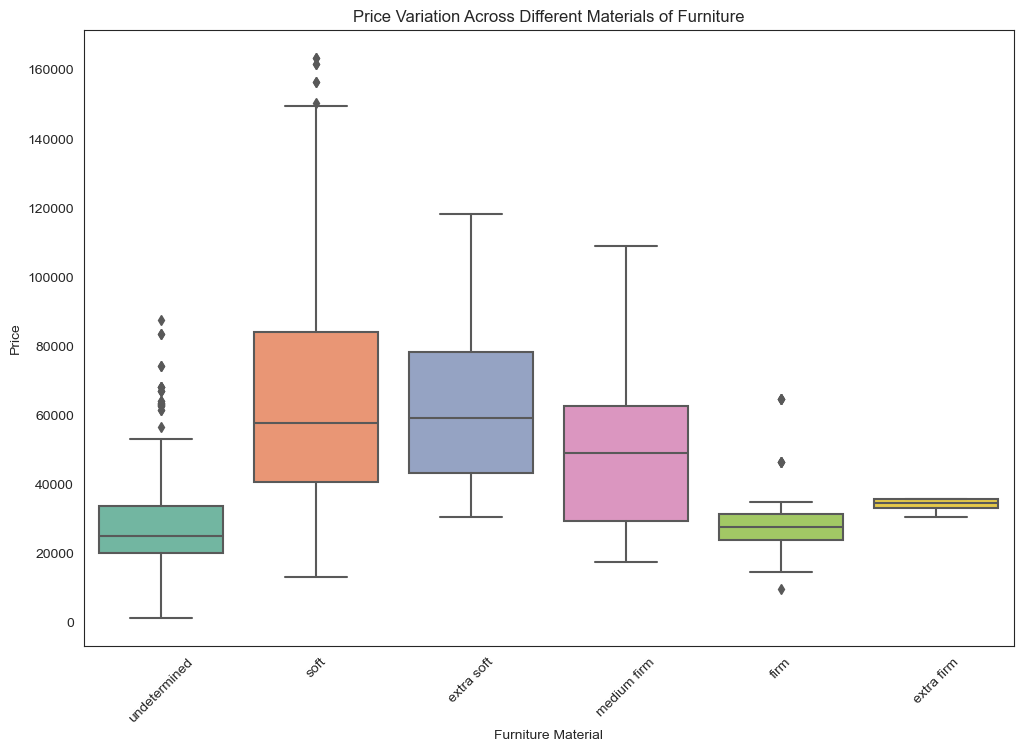

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='material', y='price', data=df, palette='Set2')
#Add title and labels
plt.title('Price Variation Across Different Materials of Furniture')
plt.xlabel('Furniture Material')
plt.ylabel('Price')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Show plot
plt.show()

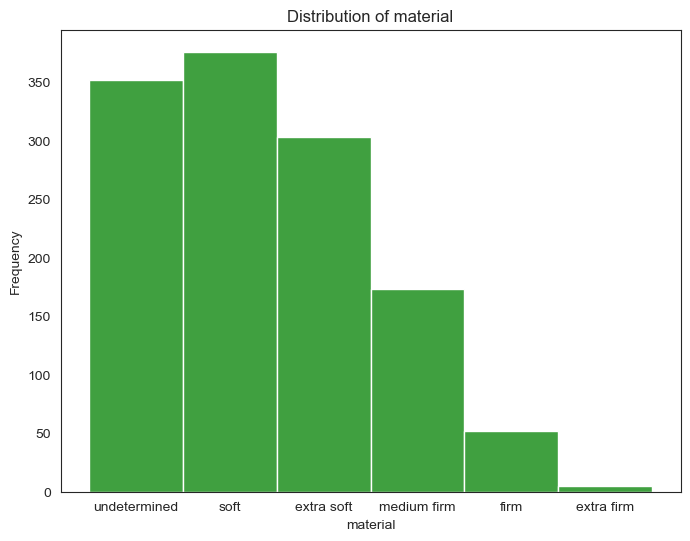

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['material'], bins=20,element='bars',color='green')
plt.title('Distribution of material')
plt.xlabel('material')
plt.ylabel('Frequency')
plt.show()

### The out comes:
The most common sofas are with material is soft with price of 60k L.E<br>
<br>

# -------------------------------------------------------------------------------------------------------

# visualize the price distribution across different number_of_seats of furniture


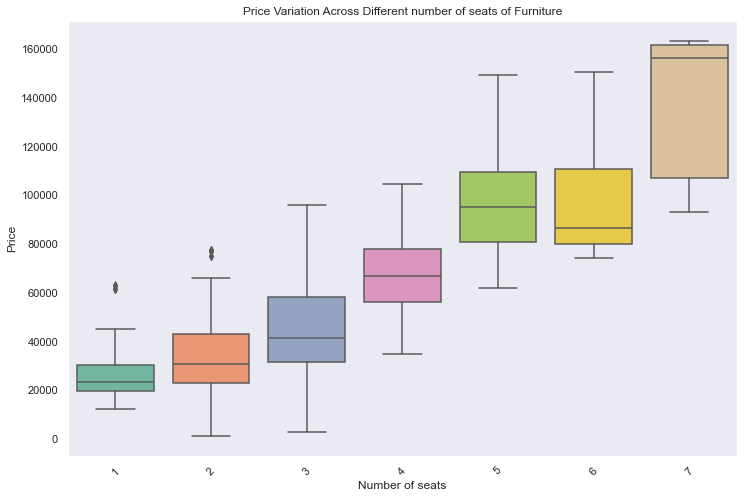

In [288]:
plt.figure(figsize=(12, 8))

#visualize the price distribution across different number_of_seats of furniture
sns.boxplot(x='number_of_seats', y='price', data=df, palette='Set2')

# Add title and labels
plt.title('Price Variation Across Different number of seats of Furniture')
plt.xlabel('Number of seats')
plt.ylabel('Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()

# visualize the price distribution across different colour of furniture


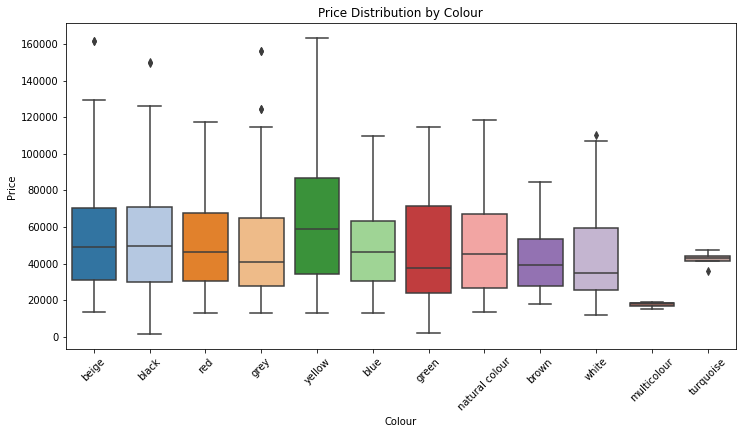

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='colour', y='price', data=df, palette='tab20')
plt.title('Price Distribution by Colour')
plt.xlabel('Colour')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()
 

# shows the distribution of prices for furniture items with and without washable covers.


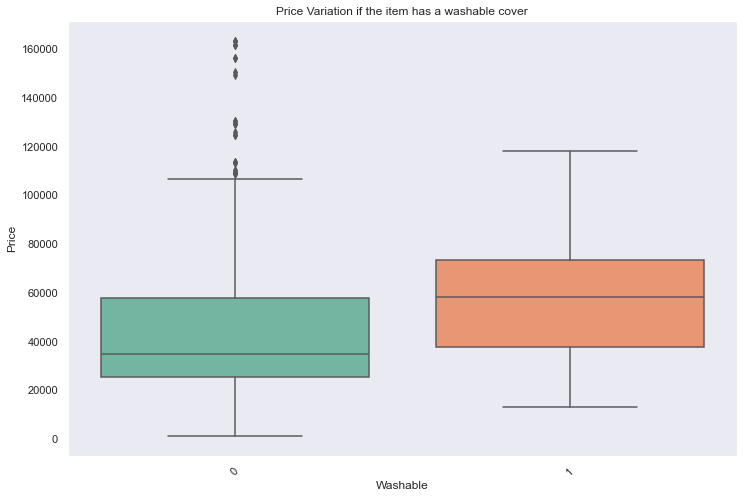

In [285]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='washable_cover', y='price', data=df, palette='Set2')
# Add title and labels
plt.title('Price Variation if the item has a washable cover')
plt.xlabel('Washable')
plt.ylabel('Price')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Show plot
plt.show()

# the relationship between the price of furniture items and the number of seats they offer.


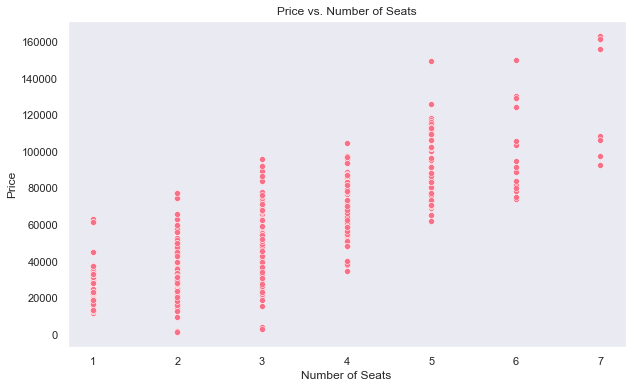

In [290]:
#the relationship between the price of furniture items and the number of seats they offer.
#There appears to be a positive correlation between price and the number of seats, as evidenced by the general trend of prices increasing with the number of seats.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_seats', y='price')
plt.title('Price vs. Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Price')
plt.show()


# what is the most frequent material ?

# How does the number of seats vary with different materials?


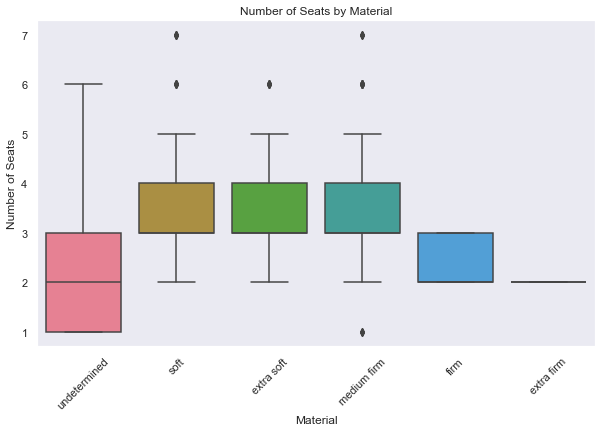

In [292]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='material', y='number_of_seats')
plt.title('Number of Seats by Material')
plt.xlabel('Material')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.show()

# what is the most frequent product ?

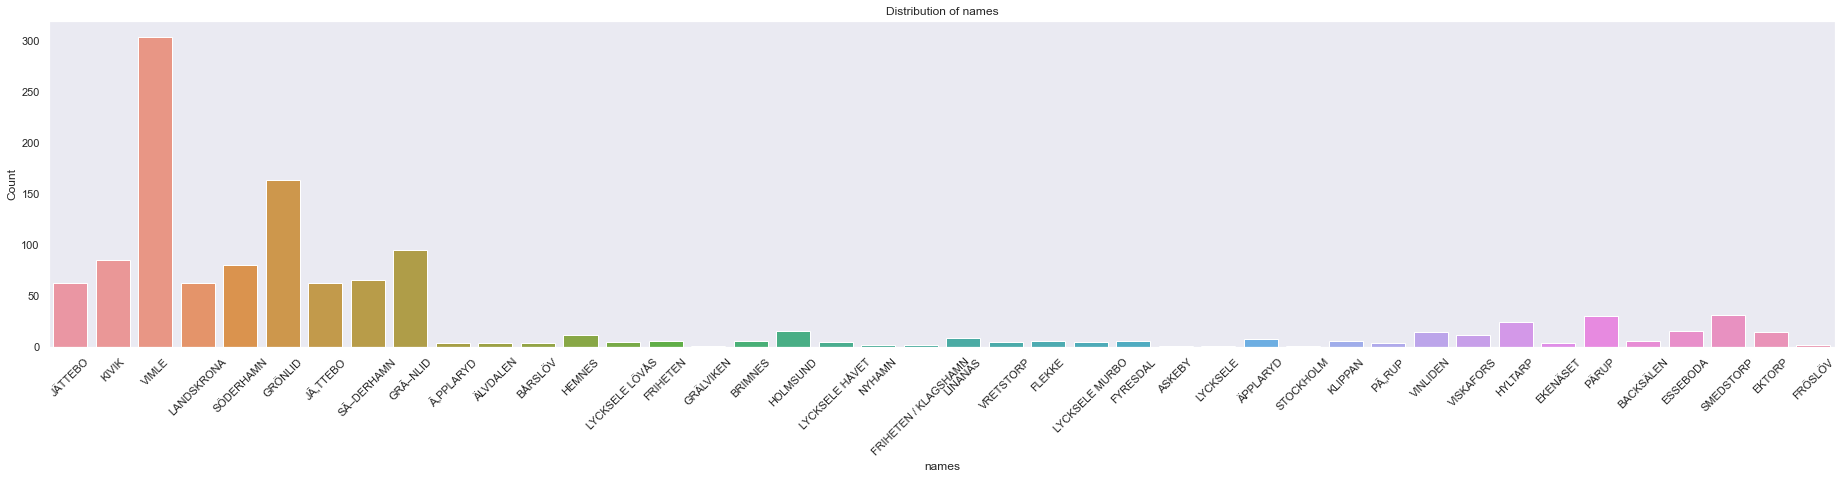

In [301]:
plt.figure(figsize=(32, 6))################3333

sns.countplot(x='name', data=df)
plt.xlabel('names')
plt.ylabel('Count')
plt.title('Distribution of names')
plt.xticks(rotation=45)
plt.show()

#  the scatter plot visualizes the relationship between the price and the number of seats for different furniture items.

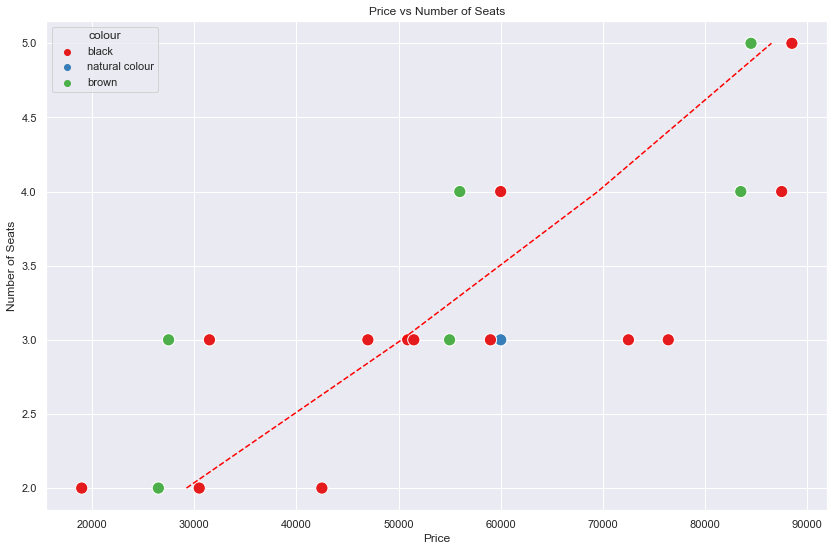

In [316]:
plt.figure(figsize=(14, 9))
#the color of the points represents the different colors of the furniture items.
df1=df[df['type']=='leather']
avg_price_by_seats = df1.groupby('number_of_seats')['price'].mean()
# Scatter plot of price vs number_of_seats
sns.scatterplot(data=df1, x='price', y='number_of_seats', hue='colour', palette='Set1',s=150)
plt.xlabel('Price')
plt.ylabel('Number of Seats')
plt.plot(avg_price_by_seats, avg_price_by_seats.index, color='red', linestyle='--', label='Average Price')
plt.title('Price vs Number of Seats')
plt.legend
plt.grid()
plt.show()

In [28]:
df.corr()

,price,number_of_seats,washable_cover
price,1.000000,0.802161,0.257795
number_of_seats,0.802161,1.000000,0.260974
washable_cover,0.257795,0.260974,1.000000


# How does the average price vary across different colors of furniture items

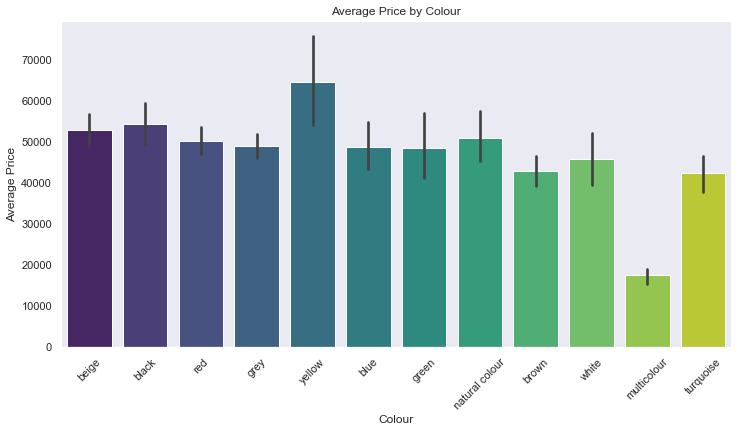

In [323]:
# The line at the top of the chart is the confidence interval (CI) for the average price of furniture items in each color category.
# In statistical terms, the confidence interval provides a range of values within which we can be confident that the true population parameter (in this case, the average price) lies.

plt.figure(figsize=(12, 6))
sns.barplot(x='colour', y='price', data=df, palette='viridis')
plt.title('Average Price by Colour')
plt.xlabel('Colour')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# "What is the distribution of furniture types based on color?"
Which Furniture Types are Most Common?

The count plot effectively combines univariate (count of furniture types) and bivariate (color distribution within types) visualizations.




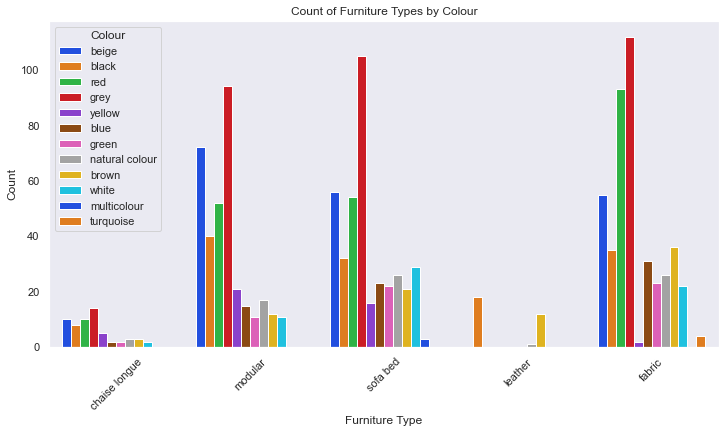

In [328]:
#Each bar represents a specific furniture type, and the height of the bar indicates the count (frequency) of that type.
palette = sns.color_palette("bright")
plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='colour', data=df, palette=palette)
plt.title('Count of Furniture Types by Colour')
plt.xlabel('Furniture Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Colour')
plt.show()

# What is the distribution of furniture types based on number_of_seats ?

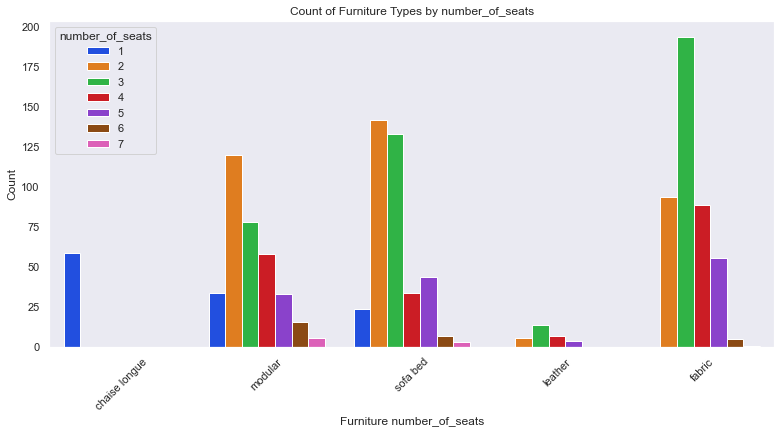

In [335]:
#Each bar represents a specific furniture number_of_seats, and the height of the bar indicates the count (frequency) of that type.
palette = sns.color_palette("bright")
plt.figure(figsize=(13, 6))
sns.countplot(x='type', hue='number_of_seats', data=df, palette=palette)
plt.title('Count of Furniture Types by number_of_seats')
plt.xlabel('Furniture number_of_seats')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='number_of_seats', loc='upper left')
plt.show()

In [271]:
avg_prices = df.groupby('type')['price'].mean().reset_index()

In [272]:
avg_prices

,type,price
0,chaise longue,30542.457627
1,fabric,50051.617312
2,leather,55226.451613
3,modular,50270.405797
4,sofa bed,53162.842377


# What is the distribution of furniture types based on whether they have washable covers or not?

 understand the proportion of furniture types that offer washable covers compared to those that do not,
 providing insights into consumer preferences and market trends regarding furniture materials and features.

 Are certain types of furniture more likely to have washable covers?


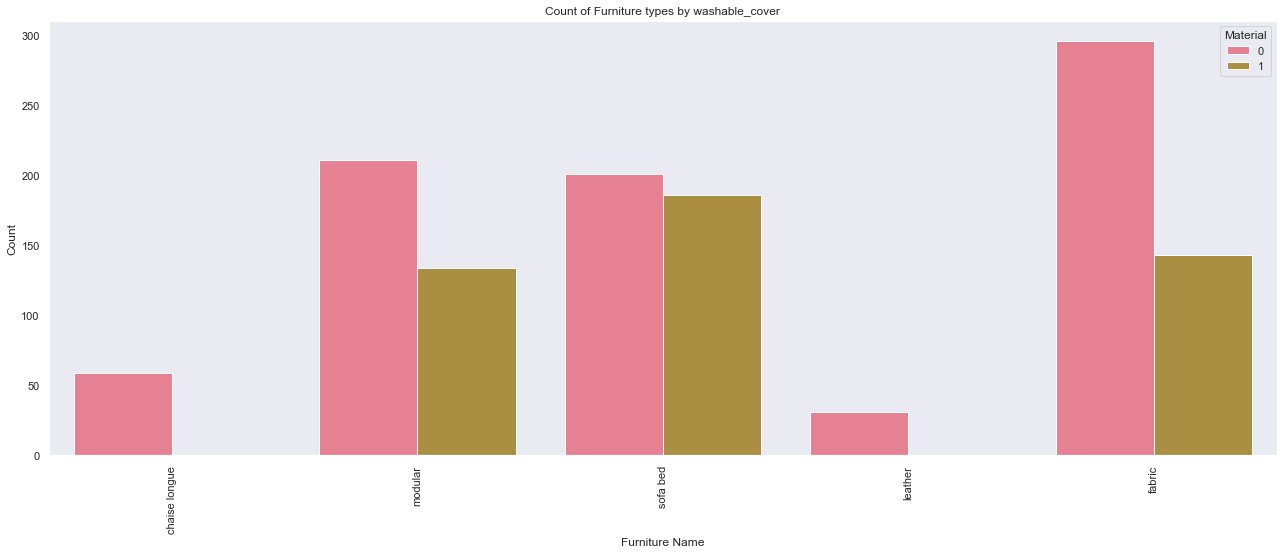

In [349]:
# Set the figure size
plt.figure(figsize=(22, 8))
sns.countplot(x='type', hue='washable_cover', data=df)
# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)#########################################################
# Set plot title and labels
plt.title('Count of Furniture types by washable_cover')
plt.xlabel('Furniture Name')
plt.ylabel('Count')
plt.legend(title='Material')

# Show plot
plt.show()

# How does the price vary across different materials for each selected furniture name?

<Figure size 864x576 with 0 Axes>

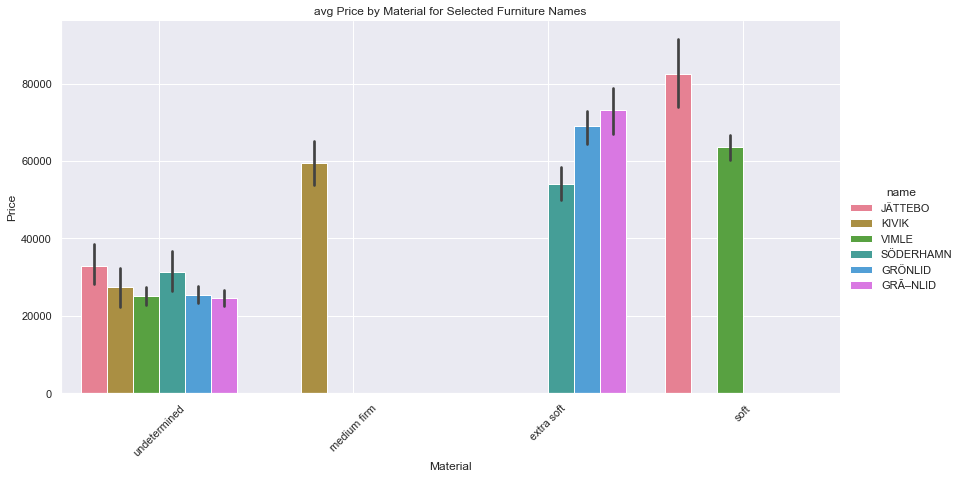

In [362]:
# Choose a subset of names to visualize
selected_names = ['JÄTTEBO', 'KIVIK', 'VIMLE','GRÃ–NLID','SÖDERHAMN','GRÖNLID']
# Filter the DataFrame to include only rows where the 'name' column matches the selected names
selected_data = df[df['name'].isin(selected_names)]

# Create a grouped bar plot to visualize the relationship between 'material' and 'price' for the selected names
plt.figure(figsize=(12, 8))
sns.catplot(x='material', y='price', hue='name', kind='bar', data=selected_data, height=6, aspect=2)
plt.title('avg Price by Material for Selected Furniture Names')
plt.xlabel('Material')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

<Figure size 864x576 with 0 Axes>

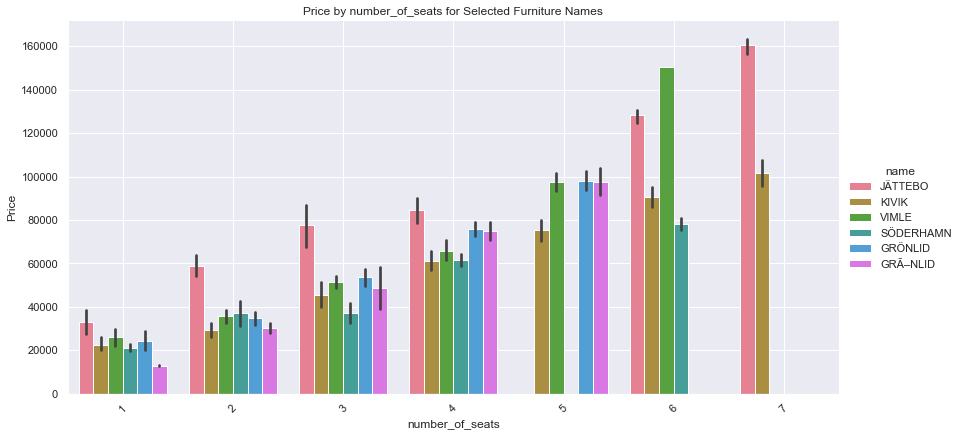

In [363]:

#Choose a subset of names to visualize
selected_names = ['JÄTTEBO', 'KIVIK', 'VIMLE','GRÃ–NLID','SÖDERHAMN','GRÖNLID']
#GRÖNLID SÖDERHAMN VIMLE KIVIK GRÃ–NLID 

# Filter the DataFrame to include only rows where the 'name' column matches the selected names
selected_data = df[df['name'].isin(selected_names)]

# Create a grouped bar plot to visualize the relationship between 'material' and 'price' for the selected names
plt.figure(figsize=(12,8))
sns.catplot(x='number_of_seats', y='price', hue='name', kind='bar', data=selected_data, height=6, aspect=2)
plt.title('Price by number_of_seats for Selected Furniture Names')
plt.xlabel('number_of_seats')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# Are there any specific materials that contribute to higher average prices within each type of furniture?

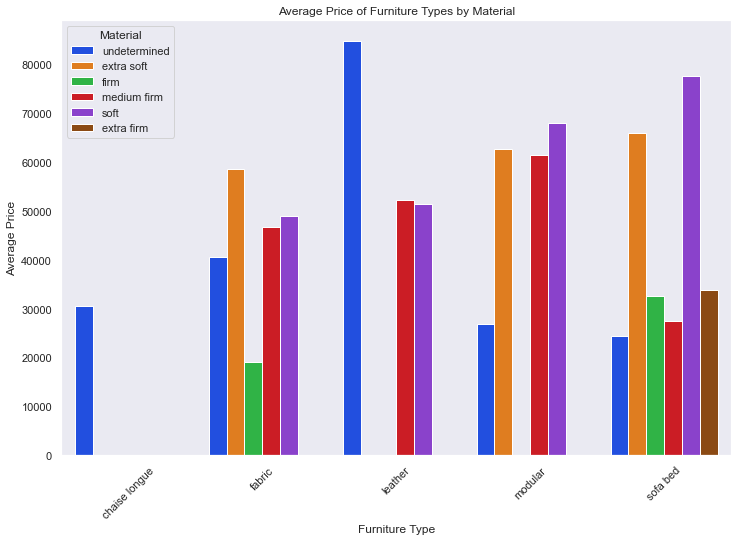

In [365]:

# Calculate the average price of each furniture type grouped by material
avg_price_data = df.groupby(['type', 'material'])['price'].mean().reset_index()

# Set the palette
palette = sns.color_palette("bright")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='type', y='price', hue='material', data=avg_price_data, palette=palette)
plt.title('Average Price of Furniture Types by Material')
plt.xlabel('Furniture Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  
plt.legend(title='Material',loc='upper left')
plt.show()
